### Hands-on Simple Linear Regression model

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
db = datasets.load_diabetes()

In [3]:
db.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [4]:
db.data.shape

(442, 10)

In [5]:
db.data[0:5,]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187239, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632753, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567042, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286131, -0.02593034],
       [-0.08906294, -0.04464164, -0.01159501, -0.03665608,  0.01219057,
         0.02499059, -0.03603757,  0.03430886,  0.02268774, -0.00936191],
       [ 0.00538306, -0.04464164, -0.03638469,  0.02187239,  0.00393485,
         0.01559614,  0.00814208, -0.00259226, -0.03198764, -0.04664087]])

In [6]:
db.target[0:5,]

array([151.,  75., 141., 206., 135.])

In [7]:
db.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
db.DESCR

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n  :Number of Instances: 442\n\n  :Number of Attributes: First 10 columns are numeric predictive values\n\n  :Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n  :Attribute Information:\n      - age     age in years\n      - sex\n      - bmi     body mass index\n      - bp      average blood pressure\n      - s1      tc, total serum cholesterol\n      - s2      ldl, low-density lipoproteins\n      - s3      hdl, high-density lipoproteins\n      - s4      tch, total cholesterol / HDL\n      - s5      ltg, possibly log of serum triglycerides level\n      - s6      glu, blood sugar

In [9]:
# Create a DataFrame from the dataset
data = pd.DataFrame(data=db.data, columns=db.feature_names)
target = pd.Series(db.target, name="target")

# Add the target variable to the DataFrame
data["target"] = target

In [10]:
data.dtypes

age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object

In [11]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


#### Lets choose one best feature for our simple linear regression model

In [12]:
# Calculate the correlation between each feature and the target variable
correlations = data.corr()["target"].abs()

# Sort the features by correlation in descending order
sorted_correlations = correlations.sort_values(ascending=False)

# Print the feature with the highest absolute correlation
best_feature = sorted_correlations.index[1]  # Index 0 is the target itself
print("Best Feature:", best_feature)

Best Feature: bmi


### Lets visualize bmi and target relation

In [13]:
import matplotlib.pyplot as plt

import seaborn as sns

In [14]:
data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

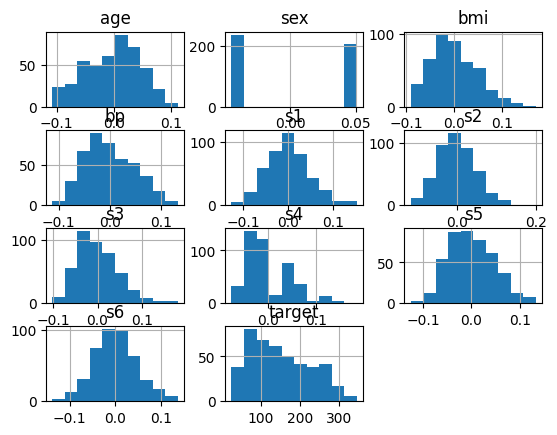

In [15]:
viz = data[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6','target']]
viz.hist()
plt.show()

C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


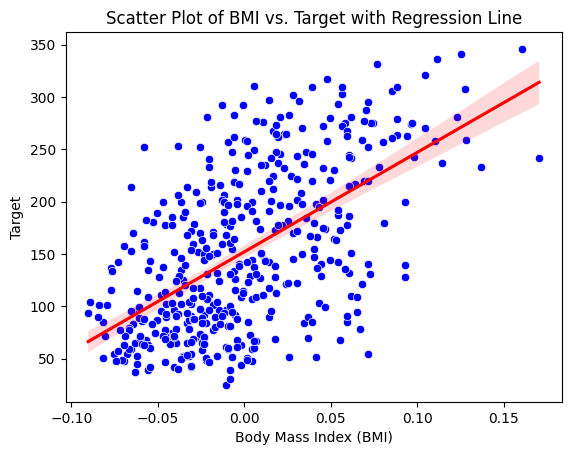

In [16]:

# Create a scatter plot with a regression line
sns.scatterplot(x='bmi', y='target', data=data, color='blue')
sns.regplot(x='bmi', y='target', data=data, scatter=False, color='red', line_kws={"color": "red"})
plt.xlabel("Body Mass Index (BMI)")
plt.ylabel("Target")
plt.title("Scatter Plot of BMI vs. Target with Regression Line")
plt.show()

### Split our data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X = data['bmi'].values.reshape(-1, 1)
y = data['target'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=4)
print(X_train.shape)
print(y_test.shape)

(309, 1)
(133,)


### Train our model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

### Test our model

In [21]:
y_train_pred = model.predict(X_test)

### Evaluate our model

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_train_pred)
mse = mean_squared_error(y_test, y_train_pred)
rmse = np.sqrt(mse)
r2_scr = r2_score(y_test, y_train_pred)  # Corrected to use y_test

print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R2-score: {r2_scr:.2f}")


Mean Absolute Error: 46.67
Mean Squared Error: 3114.13
Root Mean Squared Error: 55.80
R2-score: 0.42


### Hands-on multiple Linear Regression model

#### As real world is complex so there are multiple factors that are effecting target or outcome.

In [23]:
X = db.data
y = db.target

In [24]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [25]:
# lets scaling our dataset to ensure that all features contribute equally to the model's training process.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train the model 
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
#evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (Ridge Regression): {mse:.2f}")
print(f"R-squared (Ridge Regression): {r2:.2f}")

Mean Squared Error (Ridge Regression): 2257.80
R-squared (Ridge Regression): 0.59
